In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
with open("parsed.json") as f:
  data = json.load(f)

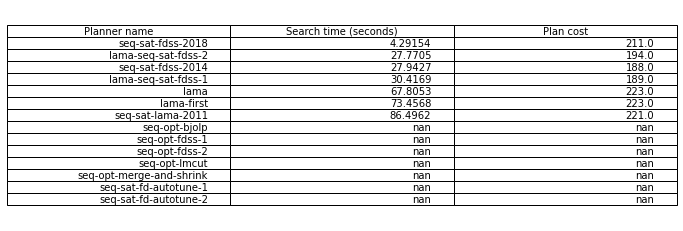

In [3]:
data_for_df = []
for solver in data:
    if data[solver]["found"]:
        search_time = data[solver]["search_time"]
        cost = data[solver]["plan_cost"]
    else:
        search_time = np.nan
        cost = np.nan
    data_for_df.append((solver, search_time, cost))

data_df = pd.DataFrame(data_for_df, columns=["Planner name", "Search time (seconds)", "Plan cost"])
data_df.sort_values(by=["Search time (seconds)", "Planner name"], inplace=True)

#https://stackoverflow.com/questions/32137396/how-do-i-plot-only-a-table-in-matplotlib
fig, ax =plt.subplots(figsize=(12,4))
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=data_df.values,colLabels=data_df.columns,loc='center')

#https://stackoverflow.com/questions/4042192/reduce-left-and-right-margins-in-matplotlib-plot
pp = PdfPages("fast_downward_ipc_planners_comparison_on_sokoban_table.pdf")
pp.savefig(fig, bbox_inches='tight')
pp.close()

In [4]:
# graph
x, y, labels = [], [], []
for solver in data:
    if data[solver]["found"]:
        labels.append(solver)
        x.append(data[solver]["search_time"])
        y.append(data[solver]["plan_cost"])

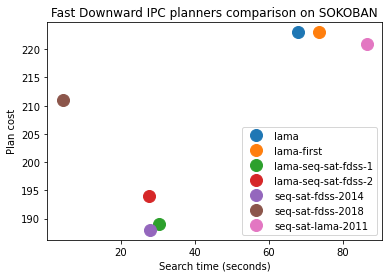

In [5]:
# Generate Data
df = pd.DataFrame(dict(x=x, y=y, label=labels))

groups = df.groupby('label')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=name)
ax.legend()
ax.set_xlabel("Search time (seconds)")
ax.set_ylabel("Plan cost")
ax.set_title("Fast Downward IPC planners comparison on SOKOBAN")


plt.savefig("fast_downward_ipc_planners_comparison_on_sokoban.pdf")
plt.show()